# Import required libraries

In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load updated csv file afer EDA

In [635]:
df=pd.read_csv('healthcare_stroke_data_updated.csv')

In [636]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.123214,1,0.816895,0,1,1,1,0.927289,0.626190,1.0,0,0,1,0,0,0,1,0,0
1,0.708205,0,0.743652,0,0,1,0,0.785821,0.442619,1.0,0,0,0,1,0,0,0,1,0
2,0.426015,1,0.975586,0,1,1,0,0.271397,0.528571,1.0,0,0,1,0,0,0,0,1,0
3,0.824928,0,0.597168,0,0,1,1,0.620312,0.573810,1.0,0,0,1,0,0,0,0,0,1
4,0.021929,0,0.963379,1,0,1,0,0.635752,0.326190,1.0,0,0,0,1,0,0,0,1,0


In [637]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [638]:
#move target variable to the end of the dataframe
column_to_move=df.pop("stroke")

df.insert(18, "stroke", column_to_move)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.123214,1,0.816895,0,1,1,1,0.927289,0.626190,0,0,1,0,0,0,1,0,0,1.0
1,0.708205,0,0.743652,0,0,1,0,0.785821,0.442619,0,0,0,1,0,0,0,1,0,1.0
2,0.426015,1,0.975586,0,1,1,0,0.271397,0.528571,0,0,1,0,0,0,0,1,0,1.0
3,0.824928,0,0.597168,0,0,1,1,0.620312,0.573810,0,0,1,0,0,0,0,0,1,1.0
4,0.021929,0,0.963379,1,0,1,0,0.635752,0.326190,0,0,0,1,0,0,0,1,0,1.0


## Selecting Important features

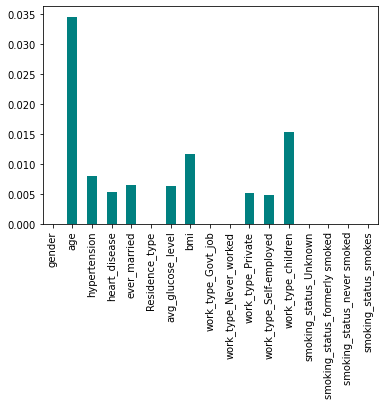

In [639]:
# Using filter methods: Information gain to know the importance of each feature w.r.t the target variable stroke and perform feature selection
from sklearn.feature_selection import mutual_info_classif

X=df.iloc[:,1:len(df.columns)-1]
y=df['stroke']

importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances,df.columns[1:len(df.columns)-1])
feat_imp.plot(kind='bar',color='teal')
plt.show()

In [640]:
# Thus, we can see features with maximum info gain are:
# Age, ever_married, bmi, heart_disease, hypertension,avg_glucose_level 
# Thus, we can select them as important features

column_to_move=df.pop("work_type_children")

df.insert(9, "work_type_children", column_to_move)

column_to_move=df.pop("Residence_type")

df.insert(10, "Residence_type", column_to_move)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_children,work_type_Govt_job,Residence_type,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.123214,1,0.816895,0,1,1,0.927289,0.626190,0,0,1,0,1,0,0,1,0,0,1.0
1,0.708205,0,0.743652,0,0,1,0.785821,0.442619,0,0,0,0,0,1,0,0,1,0,1.0
2,0.426015,1,0.975586,0,1,1,0.271397,0.528571,0,0,0,0,1,0,0,0,1,0,1.0
3,0.824928,0,0.597168,0,0,1,0.620312,0.573810,0,0,1,0,1,0,0,0,0,1,1.0
4,0.021929,0,0.963379,1,0,1,0.635752,0.326190,0,0,0,0,0,1,0,0,1,0,1.0


## Create new dataframe having important features and target variable

In [641]:

df_new=df.iloc[:,2:8]
df_new.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,0.816895,0,1,1,0.927289,0.626190
1,0.743652,0,0,1,0.785821,0.442619
2,0.975586,0,1,1,0.271397,0.528571
3,0.597168,0,0,1,0.620312,0.573810
4,0.963379,1,0,1,0.635752,0.326190


In [642]:
#move target variable to the end of the dataframe
column_to_move=df.pop("stroke")

df_new.insert(6, "stroke", column_to_move)
df_new.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0.816895,0,1,1,0.927289,0.626190,1.0
1,0.743652,0,0,1,0.785821,0.442619,1.0
2,0.975586,0,1,1,0.271397,0.528571,1.0
3,0.597168,0,0,1,0.620312,0.573810,1.0
4,0.963379,1,0,1,0.635752,0.326190,1.0


## Split the data

In [643]:
from sklearn.model_selection import train_test_split

In [644]:
X=df_new.drop('stroke',axis=1)
y=df_new['stroke']

In [645]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [646]:
print(X_train)

           age  hypertension  heart_disease  ever_married  avg_glucose_level  \
3496  0.267578             0              0             0           0.299070   
1088  0.230957             0              0             0           0.222887   
1264  0.621582             0              0             1           0.195053   
2763  0.853516             1              0             1           0.340261   
4852  0.609375             0              0             1           0.531841   
...        ...           ...            ...           ...                ...   
698   0.609375             0              0             1           0.120365   
3102  0.365234             0              0             0           0.036062   
2047  0.523926             0              0             1           0.110322   
1554  0.003906             0              0             0           0.290843   
1143  0.279785             0              0             0           0.325142   

           bmi  
3496  0.388095  
1088 

In [647]:
print(y_train)

3496    0.0
1088    0.0
1264    0.0
2763    0.0
4852    0.0
       ... 
698     0.0
3102    0.0
2047    0.0
1554    0.0
1143    0.0
Name: stroke, Length: 3002, dtype: float64


In [648]:
print(X_test.shape)

(1001, 6)


In [649]:
print(y_test.shape)

(1001,)


In [650]:
print(X_val.shape)

(1001, 6)


## Train Model

## Logistic Regression Model

In [651]:
from sklearn.linear_model import LogisticRegression

logisticRegr=LogisticRegression()

logisticRegr.fit(X_train,y_train)


LogisticRegression()

## Test the model

In [652]:
predictions=logisticRegr.predict(X_test)

## Evaluate the model

In [653]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(round(score,2))

0.94


In [654]:
from sklearn import metrics
conf_matrix= metrics.confusion_matrix(y_test, predictions)
print(conf_matrix)

[[942   0]
 [ 59   0]]


In [655]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\svirka\Desktop\DAX-DS-Assignment-2022-Sukhada_Virkar\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## Decision Tree Classifier

In [656]:
#trying out decision tree model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [657]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [658]:
preds=clf.predict(X_test)

In [659]:
conf_matrix= metrics.confusion_matrix(y_test, preds)
print(conf_matrix)

target_names = ['0','1']
print(classification_report(y_test, preds, target_names=target_names))

[[905  37]
 [ 55   4]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       942
           1       0.10      0.07      0.08        59

    accuracy                           0.91      1001
   macro avg       0.52      0.51      0.52      1001
weighted avg       0.89      0.91      0.90      1001



## Hyperparameter tuning

In [660]:
# for decision tree classifier
parameters ={"criterion":["gini", "entropy"], "max_depth":[6,8,10,12]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=parameters, cv=10)

In [661]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12]})

In [662]:
# grid.best_score_
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])

Best Criterion: entropy
Best max_depth: 6


## Tuning the model

In [664]:
# selecting the best criterion and max_depth found above
clf_tuned = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)

In [665]:
clf_tuned.fit(X_train,y_train)
y_pred=clf_tuned.predict(X_test)

conf_matrix= metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

[[928  14]
 [ 58   1]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       942
           1       0.07      0.02      0.03        59

    accuracy                           0.93      1001
   macro avg       0.50      0.50      0.49      1001
weighted avg       0.89      0.93      0.91      1001



## Save model to pickle file

In [666]:
import pickle

with open('decision_tree_tuned_model.pkl', 'wb') as files:
    pickle.dump(clf_tuned, files)


## Predict values for validate set using pickle file

In [667]:
pickled_model = pickle.load(open('decision_tree_tuned_model.pkl', 'rb'))
pred=pickled_model.predict(X_val)

In [668]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_val, pred)
print(round(score,2))

0.95


In [669]:
from sklearn import metrics
conf_matrix= metrics.confusion_matrix(y_val, pred)
print(conf_matrix)

[[949   5]
 [ 44   3]]


In [670]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_val, pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       954
           1       0.38      0.06      0.11        47

    accuracy                           0.95      1001
   macro avg       0.67      0.53      0.54      1001
weighted avg       0.93      0.95      0.93      1001



## Write validate set along with it's predicted values to csv file 

In [631]:
df_val=pd.DataFrame({'y_val':y_val,'y_pred':pred})

In [632]:
df_val.head()

,y_val,y_pred
4108,0.0,0.0
1489,0.0,0.0
4133,0.0,0.0
3899,0.0,0.0
4213,0.0,0.0


In [633]:
df_val.to_csv("validate set.csv",index=False)